In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rnacappredictor.predict_cap import predict_cap
%load_ext autoreload
%autoreload 2

In [5]:
df = pd.read_csv(
    '../data/FM185/no_sample_id/20250324_1822_MD-101425_FBC23952_d258aa5b/fastq_pass/fingerprints.csv'
)
df = df[df['barcode_num'] <= 10]
df_test_bp_to_rt = {
    1: "INDURO",
    2: "ProtoScript",
    3: "Marathon",
    4: "GoScript",
    5: "EpiScript",
    6: "INDURO",
    7: "ProtoScript",
    8: "Marathon",
    9: "GoScript",
    10: "EpiScript"
}
df['RT'] = df['barcode_num'].map(df_test_bp_to_rt)
df

,barcode,isoform,num_reads,num_A,num_C,num_G,num_T,num_DEL,num_INS,barcode_num,...,C%_INSDEL,G%_INSDEL,T%_INSDEL,INS%_INSDEL,DEL%_INSDEL,A%,C%,G%,T%,RT
0,barcode01,VU1-4,1,1,0,0,0,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,INDURO
1,barcode01,U1-82P,16,7,0,4,1,3,1,1,...,0.000000,0.250000,0.062500,0.062500,0.187500,0.583333,0.000000,0.333333,0.083333,INDURO
2,barcode01,VU1-14,1,1,0,0,0,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,INDURO
3,barcode01,U1-136P,0,0,0,0,0,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,INDURO
4,barcode01,U1-67P,8,4,0,0,2,2,0,1,...,0.000000,0.000000,0.250000,0.000000,0.250000,0.666667,0.000000,0.000000,0.333333,INDURO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,barcode10,E,32987,25086,908,1670,931,1342,3050,10,...,0.027526,0.050626,0.028223,0.092461,0.040683,0.877286,0.031754,0.058402,0.032558,EpiScript
236,barcode10,U1-42P,3,2,0,0,0,0,1,10,...,0.000000,0.000000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,EpiScript
237,barcode10,U1-63P,44,32,3,1,2,2,4,10,...,0.068182,0.022727,0.045455,0.090909,0.045455,0.842105,0.078947,0.026316,0.052632,EpiScript
238,barcode10,U1-122P,1,1,0,0,0,0,0,10,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,EpiScript


/storage/brno2/home/romanb/software/miniconda3/envs/RNA/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/storage/brno2/home/romanb/software/miniconda3/envs/RNA/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/storage/brno2/home/romanb/software/miniconda3/envs/RNA/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


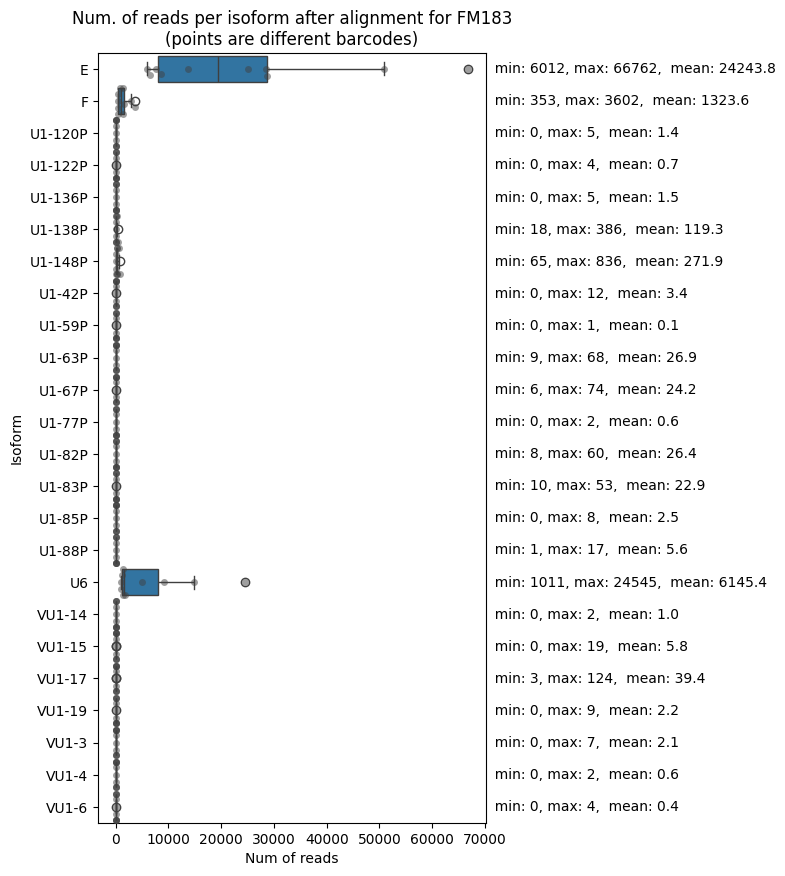

In [6]:
df = df.sort_values(by='isoform')

# Calculate stats per isoform
stats = df.groupby('isoform')['num_reads_ACGT'].agg(['min', 'max', 'mean']).round(1)

# Create the plot
fig, ax = plt.subplots(figsize=(5, 10))
sns.boxplot(y="isoform", x="num_reads_ACGT", data=df, ax=ax)
sns.swarmplot(y="isoform", x="num_reads_ACGT", data=df, color='0.25', alpha=0.5, ax=ax)

# Add stats annotations
for i, isoform in enumerate(df['isoform'].unique()):
    stats_text = f"min: {stats.loc[isoform, 'min']}, max: {stats.loc[isoform, 'max']},  mean: {stats.loc[isoform, 'mean']}"
    ax.text(ax.get_xlim()[1], i, f'  {stats_text}', va='center')

plt.title('Num. of reads per isoform after alignment for FM183\n(points are different barcodes)')
plt.xlabel('Num of reads')
plt.ylabel('Isoform')
plt.show()

In [12]:
df = df[df['num_reads_ACGT'] > 50]
df['cap'] = df['barcode_num'].apply(lambda x: "Unknow (theoretical is TMG)" if x <= 5 else 'Unknow (theoretical is NAD)')
df['experiment'] = 'FM185' + df['isoform']
df

,barcode,isoform,num_reads,num_A,num_C,num_G,num_T,num_DEL,num_INS,barcode_num,...,T%_INSDEL,INS%_INSDEL,DEL%_INSDEL,A%,C%,G%,T%,RT,cap,experiment
59,barcode03,E,14720,11806,370,726,815,301,702,3,...,0.055367,0.047690,0.020448,0.860684,0.026974,0.052927,0.059415,Marathon,Unknow (theoretical is TMG),FM185E
134,barcode06,E,10966,4285,896,1963,572,2519,731,6,...,0.052161,0.066661,0.229710,0.555340,0.116122,0.254406,0.074132,INDURO,Unknow (theoretical is NAD),FM185E
24,barcode02,E,62713,39274,2686,3003,5860,8039,3851,2,...,0.093442,0.061407,0.128187,0.772760,0.052850,0.059087,0.115302,ProtoScript,Unknow (theoretical is TMG),FM185E
102,barcode05,E,80081,56311,2380,3903,4168,4253,9066,5,...,0.052047,0.113210,0.053109,0.843459,0.035649,0.058461,0.062431,EpiScript,Unknow (theoretical is TMG),FM185E
6,barcode01,E,8172,3413,566,1307,726,1645,515,1,...,0.088840,0.063020,0.201297,0.567698,0.094145,0.217399,0.120758,INDURO,Unknow (theoretical is TMG),FM185E
171,barcode08,E,31312,25320,712,1445,1102,1179,1554,8,...,0.035194,0.049630,0.037653,0.885965,0.024913,0.050562,0.038560,Marathon,Unknow (theoretical is NAD),FM185E
154,barcode07,E,29003,22070,863,1191,957,2176,1746,7,...,0.032997,0.060201,0.075027,0.879949,0.034409,0.047486,0.038156,ProtoScript,Unknow (theoretical is NAD),FM185E
215,barcode09,E,13810,5204,688,683,2051,4059,1125,9,...,0.148516,0.081463,0.293917,0.603292,0.079759,0.079179,0.237770,GoScript,Unknow (theoretical is NAD),FM185E
235,barcode10,E,32987,25086,908,1670,931,1342,3050,10,...,0.028223,0.092461,0.040683,0.877286,0.031754,0.058402,0.032558,EpiScript,Unknow (theoretical is NAD),FM185E
85,barcode04,E,10802,2751,736,584,2456,3443,832,4,...,0.227365,0.077023,0.318737,0.421480,0.112762,0.089474,0.376283,GoScript,Unknow (theoretical is TMG),FM185E


In [23]:
df_train = pd.read_csv('../data/FM179-FM181_fingerprints.csv')
df_test1 = df[df['barcode_num'] <= 5]
df_test2 = df[df['barcode_num'] > 5]
df_res1 = predict_cap(df_train, df_test1, show_true_cap=True)
df_res2 = predict_cap(df_train, df_test2, show_true_cap=True)
df_res = pd.concat([df_res1, df_res2])
df_res


Experiment: FM185E
True cap: Unknow (theoretical is TMG)
5 RTs considered for prediction(['Marathon', 'ProtoScript', 'EpiScript', 'INDURO', 'GoScript']) with mean number of reads 28768.2
Top-1 prediction: NAD-U1 (FM179_combined) with similarity 0.980
Top-2 prediction: NAD-U1 (FM180 + FM181) with similarity 0.979
Top-3 prediction: TMG-U1 (FM179_combined) with similarity 0.973
Top-4 prediction: TMG-U1 (FM180 + FM181) with similarity 0.954
Top-5 prediction: m⁷Gp₃A-U1 (FM179_combined) with similarity 0.907
Top-6 prediction: m⁷Gp₃A-U1 (FM180 + FM181) with similarity 0.834
Top-7 prediction: Ap₄A-U1 (FM179_combined) with similarity 0.819
Top-8 prediction: Ap₄A-U1 (FM180 + FM181) with similarity 0.810


Experiment: FM185F
True cap: Unknow (theoretical is TMG)
5 RTs considered for prediction(['EpiScript', 'ProtoScript', 'INDURO', 'GoScript', 'Marathon']) with mean number of reads 1586.0
Top-1 prediction: NAD-U1 (FM179_combined) with similarity 0.972
Top-2 prediction: NAD-U1 (FM180 + FM181) with

,experiment,true_cap,num_rts,used_rts,mean_reads,prediction_1,similarity_1,prediction_2,similarity_2,prediction_3,...,prediction_4,similarity_4,prediction_5,similarity_5,prediction_6,similarity_6,prediction_7,similarity_7,prediction_8,similarity_8
0,FM185E,Unknow (theoretical is TMG),5,"[Marathon, ProtoScript, EpiScript, INDURO, GoS...",28768.2,NAD-U1 (FM179_combined),0.979756,NAD-U1 (FM180 + FM181),0.978763,TMG-U1 (FM179_combined),...,TMG-U1 (FM180 + FM181),0.953594,m⁷Gp₃A-U1 (FM179_combined),0.907390,m⁷Gp₃A-U1 (FM180 + FM181),0.834454,Ap₄A-U1 (FM179_combined),0.818798,Ap₄A-U1 (FM180 + FM181),0.809690
1,FM185F,Unknow (theoretical is TMG),5,"[EpiScript, ProtoScript, INDURO, GoScript, Mar...",1586.0,NAD-U1 (FM179_combined),0.971832,NAD-U1 (FM180 + FM181),0.971311,TMG-U1 (FM179_combined),...,TMG-U1 (FM180 + FM181),0.945665,m⁷Gp₃A-U1 (FM179_combined),0.910072,m⁷Gp₃A-U1 (FM180 + FM181),0.840716,Ap₄A-U1 (FM179_combined),0.817809,Ap₄A-U1 (FM180 + FM181),0.817188
2,FM185U1-138P,Unknow (theoretical is TMG),3,"[EpiScript, Marathon, ProtoScript]",229.0,NAD-U1 (FM179_combined),0.998490,NAD-U1 (FM180 + FM181),0.997341,TMG-U1 (FM179_combined),...,TMG-U1 (FM180 + FM181),0.962211,m⁷Gp₃A-U1 (FM179_combined),0.901926,Ap₄A-U1 (FM179_combined),0.860201,m⁷Gp₃A-U1 (FM180 + FM181),0.850566,Ap₄A-U1 (FM180 + FM181),0.797539
3,FM185U1-148P,Unknow (theoretical is TMG),5,"[Marathon, GoScript, EpiScript, ProtoScript, I...",346.4,NAD-U1 (FM179_combined),0.969409,NAD-U1 (FM180 + FM181),0.967505,TMG-U1 (FM179_combined),...,TMG-U1 (FM180 + FM181),0.943151,m⁷Gp₃A-U1 (FM179_combined),0.891987,Ap₄A-U1 (FM179_combined),0.812843,m⁷Gp₃A-U1 (FM180 + FM181),0.811183,Ap₄A-U1 (FM180 + FM181),0.811011
4,FM185U1-63P,Unknow (theoretical is TMG),2,"[ProtoScript, EpiScript]",60.5,TMG-U1 (FM179_combined),0.998393,TMG-U1 (FM180 + FM181),0.996800,NAD-U1 (FM179_combined),...,NAD-U1 (FM180 + FM181),0.994847,m⁷Gp₃A-U1 (FM179_combined),0.905031,Ap₄A-U1 (FM179_combined),0.893188,m⁷Gp₃A-U1 (FM180 + FM181),0.876303,Ap₄A-U1 (FM180 + FM181),0.866653
5,FM185U1-67P,Unknow (theoretical is TMG),1,[EpiScript],74.0,TMG-U1 (FM180 + FM181),0.996992,TMG-U1 (FM179_combined),0.996899,NAD-U1 (FM179_combined),...,NAD-U1 (FM180 + FM181),0.995711,Ap₄A-U1 (FM179_combined),0.918163,m⁷Gp₃A-U1 (FM180 + FM181),0.918100,m⁷Gp₃A-U1 (FM179_combined),0.903867,Ap₄A-U1 (FM180 + FM181),0.851563
6,FM185U1-82P,Unknow (theoretical is TMG),2,"[ProtoScript, EpiScript]",58.0,TMG-U1 (FM180 + FM181),0.993320,TMG-U1 (FM179_combined),0.992710,NAD-U1 (FM179_combined),...,NAD-U1 (FM180 + FM181),0.987847,m⁷Gp₃A-U1 (FM179_combined),0.917031,m⁷Gp₃A-U1 (FM180 + FM181),0.898975,Ap₄A-U1 (FM179_combined),0.875274,Ap₄A-U1 (FM180 + FM181),0.845500
7,FM185U1-83P,Unknow (theoretical is TMG),1,[ProtoScript],53.0,TMG-U1 (FM179_combined),0.996163,NAD-U1 (FM179_combined),0.992031,TMG-U1 (FM180 + FM181),...,NAD-U1 (FM180 + FM181),0.990283,Ap₄A-U1 (FM180 + FM181),0.903410,m⁷Gp₃A-U1 (FM179_combined),0.895560,Ap₄A-U1 (FM179_combined),0.881186,m⁷Gp₃A-U1 (FM180 + FM181),0.747140
8,FM185U6,Unknow (theoretical is TMG),5,"[Marathon, INDURO, EpiScript, ProtoScript, GoS...",8647.6,TMG-U1 (FM179_combined),0.979612,NAD-U1 (FM180 + FM181),0.969445,NAD-U1 (FM179_combined),...,TMG-U1 (FM180 + FM181),0.963767,m⁷Gp₃A-U1 (FM179_combined),0.908534,m⁷Gp₃A-U1 (FM180 + FM181),0.841145,Ap₄A-U1 (FM179_combined),0.825911,Ap₄A-U1 (FM180 + FM181),0.807105
9,FM185VU1-17,Unknow (theoretical is TMG),2,"[EpiScript, ProtoScript]",98.5,TMG-U1 (FM179_combined),0.995563,TMG-U1 (FM180 + FM181),0.992263,NAD-U1 (FM179_combined),...,NAD-U1 (FM180 + FM181),0.989131,Ap₄A-U1 (FM179_combined),0.908773,m⁷Gp₃A-U1 (FM179_combined),0.907098,Ap₄A-U1 (FM180 + FM181),0.880453,m⁷Gp₃A-U1 (FM180 + FM181),0.855855


In [32]:
print((df_res1['prediction_1'].str.startswith('TMG')).sum() / len(df_res1))
df_res1[['experiment', 'true_cap', 'prediction_1', 'similarity_1', 'prediction_2', 'similarity_2', 'prediction_3', 'similarity_3']]

0.6


,experiment,true_cap,prediction_1,similarity_1,prediction_2,similarity_2,prediction_3,similarity_3
0,FM185E,Unknow (theoretical is TMG),NAD-U1 (FM179_combined),0.979756,NAD-U1 (FM180 + FM181),0.978763,TMG-U1 (FM179_combined),0.973449
1,FM185F,Unknow (theoretical is TMG),NAD-U1 (FM179_combined),0.971832,NAD-U1 (FM180 + FM181),0.971311,TMG-U1 (FM179_combined),0.968462
2,FM185U1-138P,Unknow (theoretical is TMG),NAD-U1 (FM179_combined),0.998490,NAD-U1 (FM180 + FM181),0.997341,TMG-U1 (FM179_combined),0.978890
3,FM185U1-148P,Unknow (theoretical is TMG),NAD-U1 (FM179_combined),0.969409,NAD-U1 (FM180 + FM181),0.967505,TMG-U1 (FM179_combined),0.963709
4,FM185U1-63P,Unknow (theoretical is TMG),TMG-U1 (FM179_combined),0.998393,TMG-U1 (FM180 + FM181),0.996800,NAD-U1 (FM179_combined),0.996151
5,FM185U1-67P,Unknow (theoretical is TMG),TMG-U1 (FM180 + FM181),0.996992,TMG-U1 (FM179_combined),0.996899,NAD-U1 (FM179_combined),0.996093
6,FM185U1-82P,Unknow (theoretical is TMG),TMG-U1 (FM180 + FM181),0.993320,TMG-U1 (FM179_combined),0.992710,NAD-U1 (FM179_combined),0.989784
7,FM185U1-83P,Unknow (theoretical is TMG),TMG-U1 (FM179_combined),0.996163,NAD-U1 (FM179_combined),0.992031,TMG-U1 (FM180 + FM181),0.991386
8,FM185U6,Unknow (theoretical is TMG),TMG-U1 (FM179_combined),0.979612,NAD-U1 (FM180 + FM181),0.969445,NAD-U1 (FM179_combined),0.968222
9,FM185VU1-17,Unknow (theoretical is TMG),TMG-U1 (FM179_combined),0.995563,TMG-U1 (FM180 + FM181),0.992263,NAD-U1 (FM179_combined),0.991243


In [33]:
print((df_res2['prediction_1'].str.startswith('NAD')).sum() / len(df_res2))
df_res2[['experiment', 'true_cap', 'prediction_1', 'similarity_1', 'prediction_2', 'similarity_2', 'prediction_3', 'similarity_3']]

0.8


,experiment,true_cap,prediction_1,similarity_1,prediction_2,similarity_2,prediction_3,similarity_3
0,FM185E,Unknow (theoretical is NAD),NAD-U1 (FM179_combined),0.979992,NAD-U1 (FM180 + FM181),0.976649,TMG-U1 (FM179_combined),0.967977
1,FM185F,Unknow (theoretical is NAD),NAD-U1 (FM179_combined),0.981633,NAD-U1 (FM180 + FM181),0.978538,TMG-U1 (FM179_combined),0.969121
2,FM185U1-138P,Unknow (theoretical is NAD),NAD-U1 (FM180 + FM181),0.996688,NAD-U1 (FM179_combined),0.996190,TMG-U1 (FM179_combined),0.973581
3,FM185U1-148P,Unknow (theoretical is NAD),NAD-U1 (FM179_combined),0.989798,NAD-U1 (FM180 + FM181),0.988436,TMG-U1 (FM179_combined),0.971503
4,FM185U6,Unknow (theoretical is NAD),TMG-U1 (FM179_combined),0.979209,TMG-U1 (FM180 + FM181),0.962445,NAD-U1 (FM180 + FM181),0.945797
